In [1]:
__author__='Philipp Kats'

%matplotlib inline 
import matplotlib.pylab as plt

import pandas as pd
import geopandas as gd
# import numpy as np

import requests
##  nice graphs design by Federika
s = requests.get("https://raw.githubusercontent.com/Casyfill/CUSP_templates/master/Py/fbMatplotlibrc.json").json()
plt.rcParams.update(s)

Failed `CDLL(/opt/local/lib/libgeos_c.dylib)`
/Users/casy/anaconda/lib/python2.7/site-packages/matplotlib/__init__.py:855: UserWarning: svg.embed_char_paths is deprecated and replaced with svg.fonttype; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


In [2]:
import os
PATH = os.environ

## I. Loading and Cleaning 311 data

In [3]:

path = PATH + data/2015_10_9_311_Service_Requests_from_2010_to_Present.csv"
df = pd.read_csv(path, na_values='Unspecified')

/Users/casy/anaconda/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2902: DtypeWarning: Columns (8,17,38,39,40,47,48,49) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


### parse timedata

In [19]:
dateParse = lambda x: pd.datetime.strptime(x, '%m/%d/%Y %I:%M:%S %p')
df['Created Date'] = df['Created Date'].apply(dateParse)

In [20]:
df['year'] = df['Created Date'].apply(lambda x: x.year)

### TOBEDONE: Here gonna be saving to HDF5 AND MONGHDB 

In [24]:
## Save to HDF5
# hdf5Path = PATH + "data/2015_10_9_311.h5"
# df.to_hdf(hdf5Path, 'data', mode='w', format='table')
# del df 

## II. Review datum

In [7]:
for i, x in enumerate(df.columns): print i,': ', x

0 :  Unique Key
1 :  Created Date
2 :  Closed Date
3 :  Agency
4 :  Agency Name
5 :  Complaint Type
6 :  Descriptor
7 :  Location Type
8 :  Incident Zip
9 :  Incident Address
10 :  Street Name
11 :  Cross Street 1
12 :  Cross Street 2
13 :  Intersection Street 1
14 :  Intersection Street 2
15 :  Address Type
16 :  City
17 :  Landmark
18 :  Facility Type
19 :  Status
20 :  Due Date
21 :  Resolution Description
22 :  Resolution Action Updated Date
23 :  Community Board
24 :  Borough
25 :  X Coordinate (State Plane)
26 :  Y Coordinate (State Plane)
27 :  Park Facility Name
28 :  Park Borough
29 :  School Name
30 :  School Number
31 :  School Region
32 :  School Code
33 :  School Phone Number
34 :  School Address
35 :  School City
36 :  School State
37 :  School Zip
38 :  School Not Found
39 :  School or Citywide Complaint
40 :  Vehicle Type
41 :  Taxi Company Borough
42 :  Taxi Pick Up Location
43 :  Bridge Highway Name
44 :  Bridge Highway Direction
45 :  Road Ramp
46 :  Bridge Highway S

In [34]:
df.head(2)

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Garage Lot Name,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location,year
0,31703390,2015-10-08 23:47:00,10/08/2015 11:47:00 PM,DSNY,Queens East 12,Derelict Vehicles,14 Derelict Vehicles,Street,11436,145-49 115 AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,40.683453,-73.796956,"(40.68345291101772, -73.79695647540593)",2015
1,31704028,2015-10-08 02:46:12,NaN,DSNY,Department of Sanitation,Graffiti,Graffiti,Mixed Use,10025,174 WEST 107 STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,40.800718,-73.964307,"(40.800717570722846, -73.9643071172048)",2015


In [35]:
df.describe()

,Unique Key,X Coordinate (State Plane),Y Coordinate (State Plane),Latitude,Longitude,year
count,10030671.000000,9164700.000000,9164700.000000,9164700.000000,9164700.000000,10030671.000000
mean,24406427.153085,1005306.376199,205254.832497,40.729999,-73.923988,2012.478176
std,4514997.124963,22667.703165,31800.622767,0.087287,0.081744,1.714513
min,10564222.000000,-195555.000000,-195555.000000,39.552555,-78.184508,2010.000000
25%,20619864.500000,993522.000000,181687.000000,40.665318,-73.966574,2011.000000
50%,24707497.000000,1004475.000000,202191.000000,40.721591,-73.927019,2013.000000
75%,28304601.500000,1017947.000000,234632.000000,40.810660,-73.878350,2014.000000
max,31707633.000000,1067302.000000,271876.000000,40.912869,-73.700292,2015.000000


## III. Parks

In [23]:
pdf = df[pd.notnull(df['Park Facility Name'])]
print len(pdf)
print 100.0 * len(pdf)/ len(df), '% of total'

66395
0.661919825703 % of total


In [12]:
# outPath = PATH + "data/2015_10_9_311_parks.csv"
# pdf.to_csv(outPath)

## complains per park

In [13]:
pdf['Park Facility Name'].value_counts()

Central Park                                                          2487
Riverside Park                                                        1186
Prospect Park                                                          930
Rockaway Beach Boardwalk                                               754
Flushing Meadows Corona Park                                           722
Beach - Brighton                                                       595
Hudson River Park                                                      484
Morningside Park                                                       430
Tompkins Square Park                                                   403
Marine Park                                                            400
Forest Park                                                            399
Van Cortlandt Park                                                     362
Washington Square Park                                                 361
Mccarren Park            

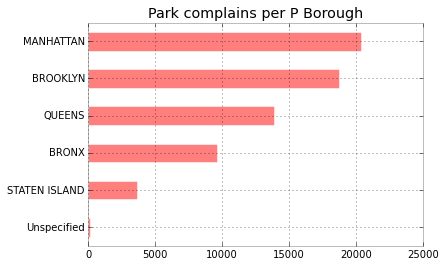

In [14]:
pdf['Park Borough'].value_counts(ascending=True).plot(kind='barh', color='red', alpha=.5, title='Park complains per P Borough');

In [15]:
x =  df['Park Borough'].value_counts()
y =  pdf['Park Borough'].value_counts()


/Users/casy/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:2: FutureWarning: sort is deprecated, use sort_values(inplace=True) for for INPLACE sorting
  from ipykernel import kernelapp as app


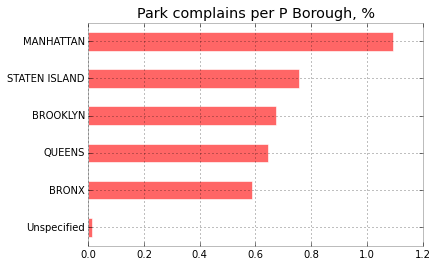

In [16]:
relative_complains = 100*y/x
relative_complains.sort(ascending=True)
relative_complains.plot(kind='barh', color='red', alpha=.6, title='Park complains per P Borough, %');

## IV. Time series

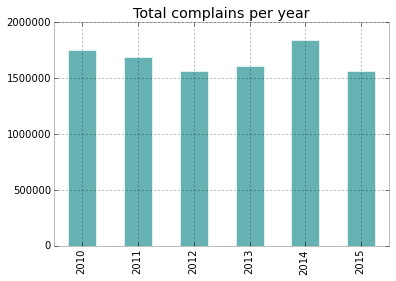

In [21]:
df['year'].value_counts().sort_index().plot(kind='bar', color='teal', alpha=.6, title='Total complains per year');

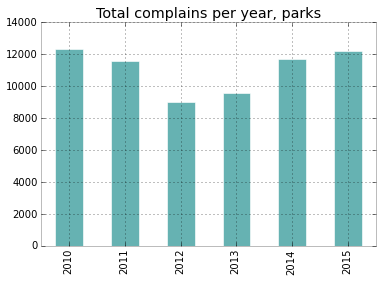

In [24]:
pdf['year'].value_counts().sort_index().plot(kind='bar', color='teal', alpha=.6, title='Total complains per year, parks');

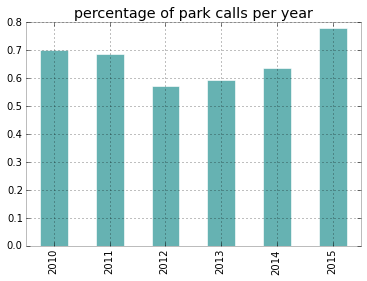

In [68]:
temp_complain_ratio = 100.0*(pdf['year'].value_counts()/df['year'].value_counts())
temp_complain_ratio.sort_index().plot(kind='bar', color='teal', alpha=.6, title='percentage of park calls per year');

### Seasonal fluctuation

In [25]:
#binning calls monthly

grouper = pd.TimeGrouper("1M", key='Created Date')

boro = pdf.groupby('Park Borough')

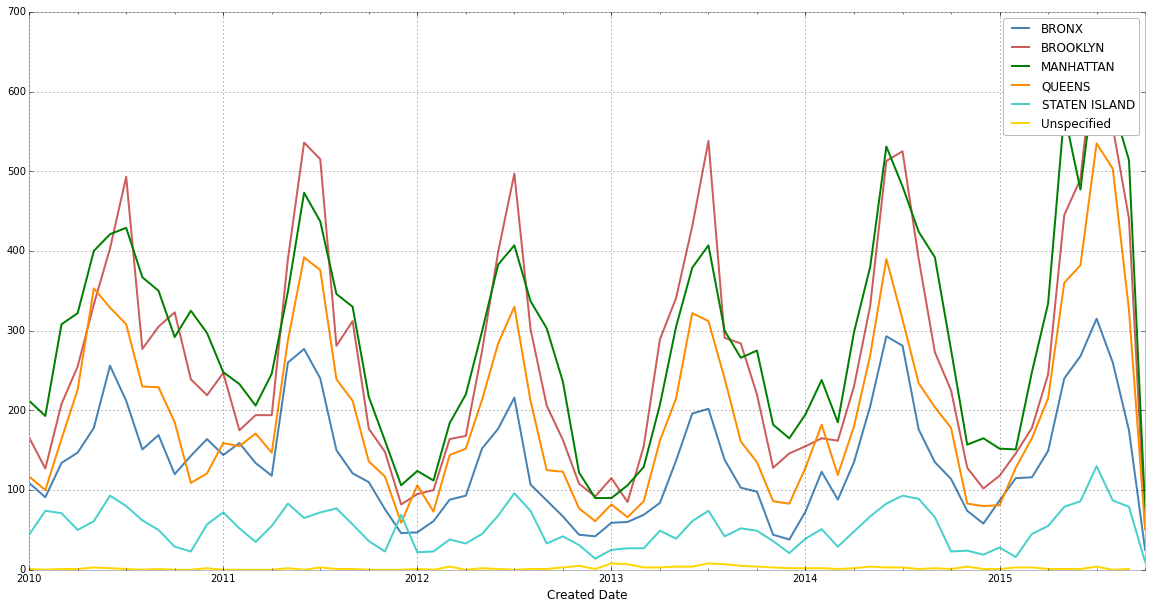

In [31]:
plt.figure(figsize=(20,10));


for name, g in boro:
    g.groupby(grouper).size().plot(label=name)
    
plt.title('311 Park calls total per month, Park Boroughs')
plt.legend();
